# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

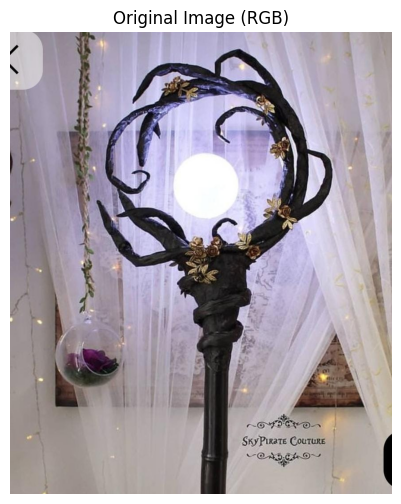

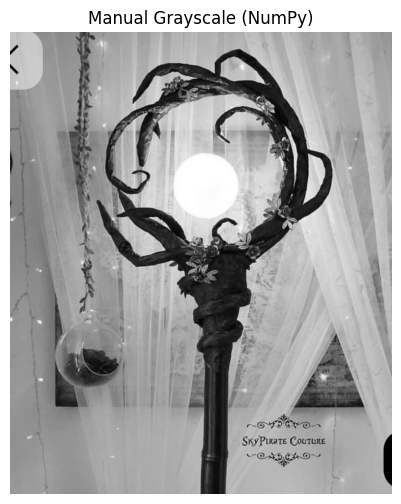

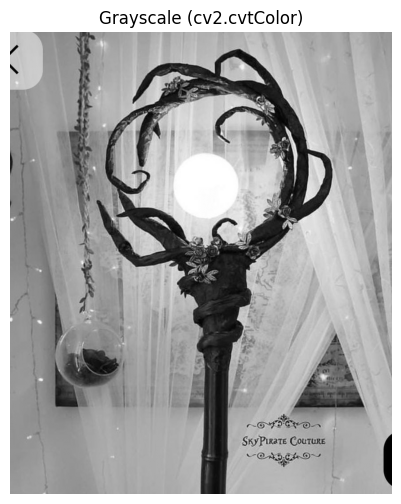

RGB image shape       : (1041, 860, 3)
Manual grayscale shape: (1041, 860)
cv2 grayscale shape   : (1041, 860)

Sample RGB pixel  (100,100): [158 149 166]
Manual Gray pixel  (100,100): 153
cv2 Gray pixel     (100,100): 154


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_bgr = cv2.imread("/content/drive/MyDrive/IMG-20251203-WA0062.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

# Manual Grayscale Conversion
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Weighted grayscale formula
gray_manual = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(gray_manual, cmap="gray")
plt.title("Manual Grayscale (NumPy)")
plt.axis("off")
plt.show()

# Grayscale using OpenCV built in function
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray_cv, cmap='gray')
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")
plt.show()

# Print shapes of arrays for verification
print("RGB image shape       :", img_rgb.shape)
print("Manual grayscale shape:", gray_manual.shape)
print("cv2 grayscale shape   :", gray_cv.shape)

#  Compare pixel values at a sample location
print("\nSample RGB pixel  (100,100):", img_rgb[100, 100])
print("Manual Gray pixel  (100,100):", gray_manual[100, 100])
print("cv2 Gray pixel     (100,100):", gray_cv[100, 100])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

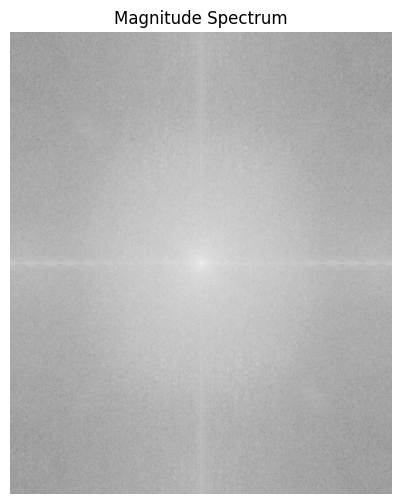

In [ ]:
# Compute the 2D FFT of the grayscale image
f = np.fft.fft2(gray_cv)          # Compute FFT
fshift = np.fft.fftshift(f)       # Shift zero-frequency component to the center

# Compute Magnitude and Phase
magnitude = 20 * np.log(np.abs(fshift) + 1)
phase = np.angle(fshift)          # Phase spectrum

# Display the Magnitude Spectrum
plt.figure(figsize=(6, 6))
plt.imshow(np.log(1 + magnitude), cmap='gray')  # Extra log for better contrast
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

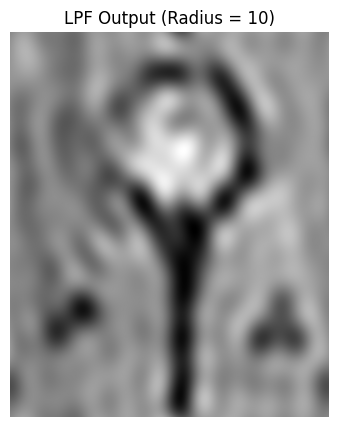

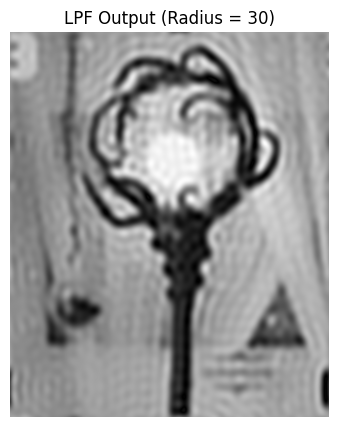

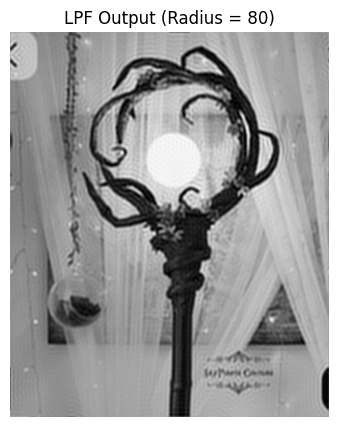

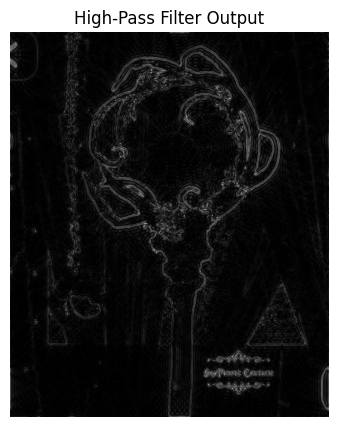

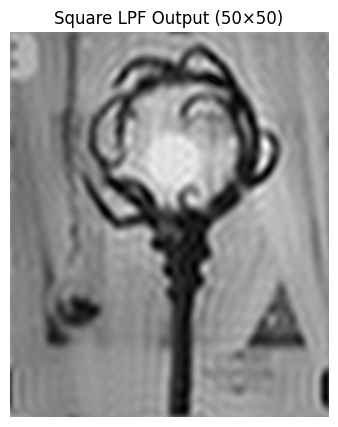

In [ ]:
# Get image dimensions
rows, cols = gray_cv.shape
crow, ccol = rows // 2, cols // 2   # Center point of the frequency domain

# Function: Create a circular low pass filter mask of a given radius
def circular_lpf(radius):
    mask = np.zeros((rows, cols), np.uint8)
    Y, X = np.ogrid[:rows, :cols]              # Efficient grid generation
    dist = (X - ccol)**2 + (Y - crow)**2       # Squared distance from center
    mask[dist <= radius**2] = 1                # Inside circle = pass band
    return mask

# Apply Circular LPF for different radius
radii = [10, 30, 80]

for r in radii:
    mask = circular_lpf(r)

    # Apply LPF mask on shifted FFT
    fshift_filtered = fshift * mask

    # Inverse FFT to reconstruct filtered image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))

    # Display filtered image
    plt.figure(figsize=(5, 5))
    plt.imshow(img_back, cmap='gray')
    plt.title(f"LPF Output (Radius = {r})")
    plt.axis("off")
    plt.show()

# High Pass Filter: using complement of a large-radius LPF
radius_hpf = 60
lpf = circular_lpf(radius_hpf)
hpf_mask = 1 - lpf       # HPF mask = inverse of LPF mask

# Apply HPF mask
fshift_hpf = fshift * hpf_mask

# Reconstruct HPF output
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_hpf = np.abs(np.fft.ifft2(f_ishift_hpf))

plt.figure(figsize=(5, 5))
plt.imshow(img_hpf, cmap='gray')
plt.title("High-Pass Filter Output")
plt.axis("off")
plt.show()

# Square Low-Pass Filter
side = 50   # Side length of the central square region

# Create square mask around center
square_mask = np.zeros((rows, cols), np.uint8)
square_mask[crow - side//2 : crow + side//2,
            ccol - side//2 : ccol + side//2] = 1

# Apply square LPF mask
fshift_square = fshift * square_mask

# Reconstruct
f_ishift_square = np.fft.ifftshift(fshift_square)
img_square = np.abs(np.fft.ifft2(f_ishift_square))

# Display result
plt.figure(figsize=(5, 5))
plt.imshow(img_square, cmap='gray')
plt.title("Square LPF Output (50×50)")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

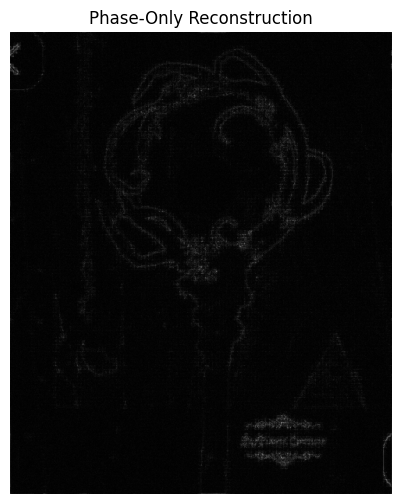

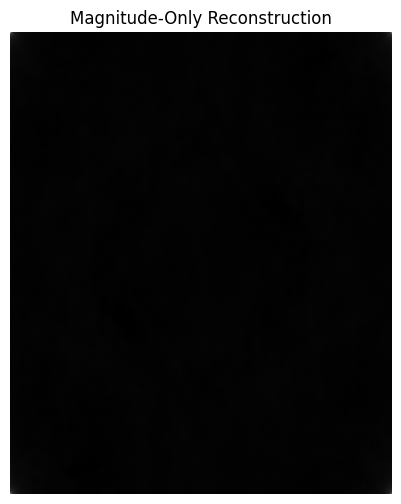

In [ ]:
# Phase-Only Reconstruction
# Normalize FFT so only the phase remains
phase_only = fshift / (np.abs(fshift) + 1e-8)

# Inverse FFT after centering shift
f_ishift_phase = np.fft.ifftshift(phase_only)
img_phase_only = np.abs(np.fft.ifft2(f_ishift_phase))

# Display phase-only reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis("off")
plt.show()

# Magnitude-Only Reconstruction
# Extract magnitude
mag_only = np.abs(fshift)

# Convert magnitude to complex by giving it zero phase
mag_only_complex = mag_only * np.exp(1j * 0)

# Inverse FFT to reconstruct image from magnitude only
f_ishift_mag = np.fft.ifftshift(mag_only_complex)
img_mag_only = np.abs(np.fft.ifft2(f_ishift_mag))

# Display magnitude-only reconstruction
plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

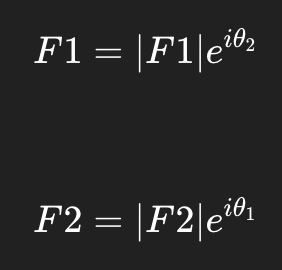

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

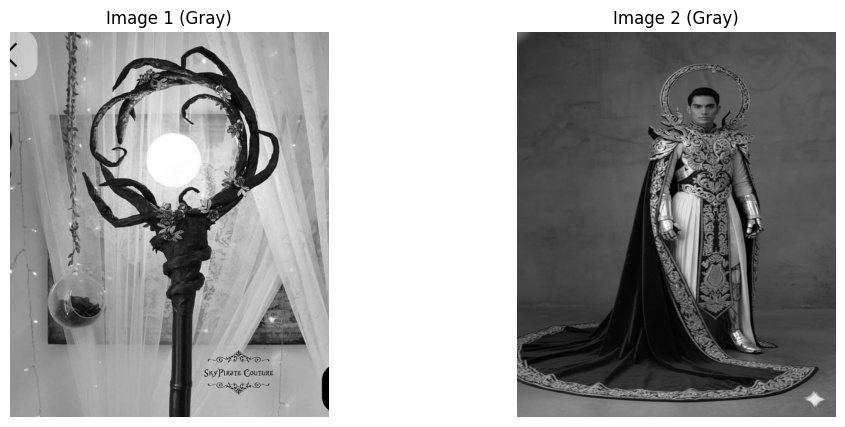

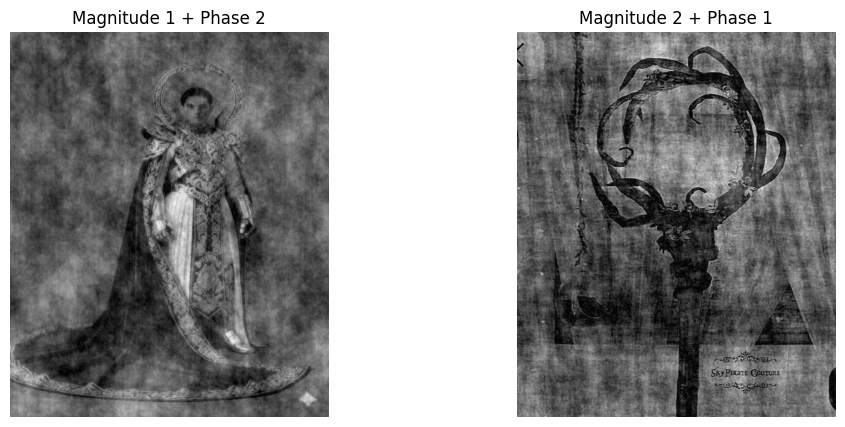

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load second image and convert to grayscale
img2_bgr = cv2.imread("/content/drive/MyDrive/IMG-20251209-WA0019.jpg")
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray2 = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)

# Resize second image to match dimensions of the first image
h, w = gray_cv.shape
gray2 = cv2.resize(gray2, (w, h))

# Display the two grayscale images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_cv, cmap='gray')
plt.title("Image 1 (Gray)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title("Image 2 (Gray)")
plt.axis("off")
plt.show()

# Compute FFT and extract magnitude + phase for Image 1
f1 = np.fft.fft2(gray_cv)
f1shift = np.fft.fftshift(f1)
mag1 = np.abs(f1shift)
phase1 = np.angle(f1shift)

# Compute FFT and extract magnitude + phase for Image 2
f2 = np.fft.fft2(gray2)
f2shift = np.fft.fftshift(f2)
mag2 = np.abs(f2shift)
phase2 = np.angle(f2shift)

# Swap: Magnitude of Image 1 + Phase of Image 2
swap12 = mag1 * np.exp(1j * phase2)

# Inverse FFT to reconstruct swapped image
img_swap12 = np.fft.ifft2(np.fft.ifftshift(swap12))
img_swap12 = np.abs(img_swap12)

# Swap: Magnitude of Image 2 + Phase of Image 1
swap21 = mag2 * np.exp(1j * phase1)

# Inverse FFT
img_swap21 = np.fft.ifft2(np.fft.ifftshift(swap21))
img_swap21 = np.abs(img_swap21)

# Display swapped results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_swap12, cmap='gray')
plt.title("Magnitude 1 + Phase 2")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_swap21, cmap='gray')
plt.title("Magnitude 2 + Phase 1")
plt.axis("off")

plt.show()

# Task
Create a Python script that loads an image from a base64 string, displays it in RGB, converts it to grayscale using both NumPy (with the weighted sum formula 0.2989*R + 0.5870*G + 0.1140*B) and OpenCV's cv2.cvtColor(cv2.COLOR_RGB2GRAY) function, compares the two grayscale results, and then prints the array shapes and a few representative pixel values for the original RGB image and both grayscale versions, commenting on the observed differences in number of channels and pixel values.

## Load Image

### Subtask:
Load an image into the notebook from a base64 string and convert it to a NumPy array.


**Reasoning**:
The subtask requires loading an image from a base64 string and converting it to a NumPy array. This code block will import the necessary libraries, define a placeholder for the base64 string, decode it, open the image, convert it to a NumPy array, and then display it to confirm successful loading.

